Epoch 500, Loss: 0.001534
Epoch 1000, Loss: 0.000224
Epoch 1500, Loss: 0.000352
Epoch 2000, Loss: 0.000040
Epoch 2500, Loss: 0.000032
Epoch 3000, Loss: 0.000032
Epoch 3500, Loss: 0.000033
Epoch 4000, Loss: 0.000033
Epoch 4500, Loss: 0.000032
Epoch 5000, Loss: 0.000030


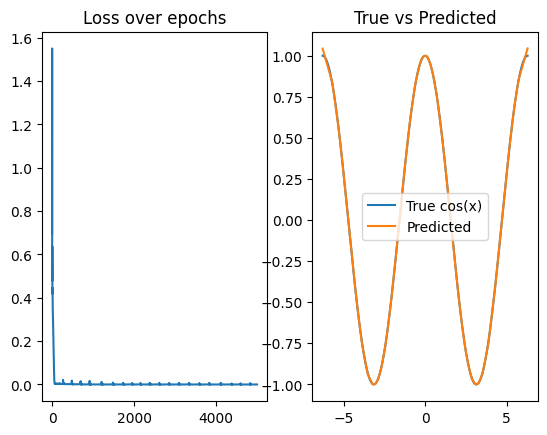

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.linspace(-2 * torch.pi, 2 * torch.pi, 1000).unsqueeze(1)
y = torch.cos(x)

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


losses = []
for epoch in range(5000):
    optimizer.zero_grad()
    loss = criterion(model(x), y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.6f}")

with torch.no_grad():
    predicted = model(x)

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over epochs")
plt.subplot(1, 2, 2)
plt.plot(x, y, label='True cos(x)')
plt.plot(x, predicted, label='Predicted')
plt.title("True vs Predicted")
plt.legend()
plt.show()
